In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 적용을 위한 정리
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
sr = pd.Series([95,90,55,60,76,80,76,88,30,25],name='국어점수')
sr.index = ['홍길동', '이순신','임꺽정','정난정','이이','이황','정도전','김철수1','김철수2','김철수3']
sr

홍길동     95
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

# 연습문제
1. 국어점수가 가장 큰 값을 구하시오
2. 국어점수가 가장 큰 값의 이름을 구하시오
3. 국어점수가 80점 이상인 값을 구하시오
4. 국어점수가 50점 이상 80점 이하인 값을 구하시오
5. 이름이 김으로 시작하는 데이터를 구하시오
6. 국어점수의 평균을 구하시오
7. 국어점수의 총합을 구하시오
8. 국어점수의 표준편차를 구하시오
9. 국어점수가 40점 이하인 데이터를 삭제하시오
10. 국어점수가 50점 이상인 데이터에 가산점 10%를 미만인 경우는 20%를 부여하시오
11. 국어점수 top 5를 구하시오
12. 국어점수가 50점 이상인 데이터의 바차트를 그리시오
13. 국어점수의 범위(0~50, 50~70, 70~100)별 도수를 구하시오
14. 아래처럼 출력하시오 (70점 이상 합격 미만 불합격)

==========================<br>
이름    국어    합격여부

==========================<br>
홍길동    90    합격
이순신    90    합격
...

In [3]:
# 1번
sr.max()

95

In [5]:
# 2번
sr.idxmax()

'홍길동'

In [8]:
# 3번
sr[sr>=80]

홍길동     95
이순신     90
이황      80
김철수1    88
Name: 국어점수, dtype: int64

In [24]:
# 4번
tmd = sr[sr<=80]
res = tmd[tmd>=50]
res

임꺽정    55
정난정    60
이이     76
이황     80
정도전    76
Name: 국어점수, dtype: int64

In [27]:
# 4번
sr[(sr>=50) & (sr<=80)] # and 를 넣어서는 안되는데 &로 하니 됐다 이유가 뭔지는 잘 모르겠다...

임꺽정    55
정난정    60
이이     76
이황     80
정도전    76
Name: 국어점수, dtype: int64

In [22]:
# 5번
sr[sr.index.str.contains('^김')]

김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

In [28]:
# 6. 국어점수의 평균을 구하시오
sr.mean()

67.5

In [29]:
# 7. 국어점수의 총합을 구하시오
sr.sum()

675

In [30]:
# 8. 국어점수의 표준편차를 구하시오
sr.std()

24.51416823888676

In [33]:
# 9. 국어점수가 40점 이하인 데이터를 삭제하시오
res = sr[sr>40]
res

'''
다른 풀이
sr.drop(sr[sr<=40].index)
'''

홍길동     95
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
Name: 국어점수, dtype: int64

In [34]:
# 10. 국어점수가 50점 이상인 데이터에 가산점 10%를 미만인 경우는 20%를 부여하시오
def fn(n):
    if n >=50:
        return n*1.1
    else:
        return n*1.2
sr.apply(fn)
# 람다 표현식
# sr.apply(lamnda v : v*1.1 if v>=50 else v*1.2)

홍길동     104.5
이순신      99.0
임꺽정      60.5
정난정      66.0
이이       83.6
이황       88.0
정도전      83.6
김철수1     96.8
김철수2     36.0
김철수3     30.0
Name: 국어점수, dtype: float64

In [35]:
# 11. 국어점수 top 5를 구하시오
sr.nlargest(5)

홍길동     95
이순신     90
김철수1    88
이황      80
이이      76
Name: 국어점수, dtype: int64

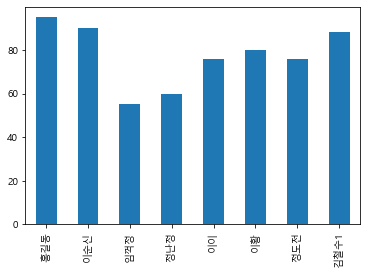

In [37]:
# 12. 국어점수가 50점 이상인 데이터의 바차트를 그리시오
res = sr[sr>=50]
res.plot(kind='bar')
plt.show()

In [39]:
# 13. 국어점수의 범위(0~50, 50~70, 70~100)별 도수를 구하시오
pd.cut(sr,[0,50,70,100])

홍길동     (70, 100]
이순신     (70, 100]
임꺽정      (50, 70]
정난정      (50, 70]
이이      (70, 100]
이황      (70, 100]
정도전     (70, 100]
김철수1    (70, 100]
김철수2      (0, 50]
김철수3      (0, 50]
Name: 국어점수, dtype: category
Categories (3, interval[int64, right]): [(0, 50] < (50, 70] < (70, 100]]

In [46]:
# 14. 아래처럼 출력하시오 (70점 이상 합격 미만 불합격)
print('=========================')
print('이름    국어    합격여부')
print('=========================')
for i,j in sr.items():
    if j>=70:
        print(i,j,'합격',sep='\t')
    else:
        print(i,j,'불합격',sep='\t')
        
    # 다른 풀이 print(i,j,'합격' if v>=70 else '불합격', sep='\t')

이름    국어    합격여부
홍길동	95	합격
이순신	90	합격
임꺽정	55	불합격
정난정	60	불합격
이이	76	합격
이황	80	합격
정도전	76	합격
김철수1	88	합격
김철수2	30	불합격
김철수3	25	불합격
